<a href="https://colab.research.google.com/github/prakhya-26/ML-projects/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kagglehub

In [ ]:
import kagglehub

#dataset from respective kaggle owner
path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:00<00:00, 67.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shantanudhakadd/bank-customer-churn-prediction/versions/1


In [ ]:
import pandas as pd
import os

files = os.listdir(path)
print(files)

['Churn_Modelling.csv']


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv(path+"/Churn_Modelling.csv")

In [ ]:
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.isnull().any()

,0
RowNumber,False
CustomerId,False
Surname,False
CreditScore,False
Geography,False
Gender,False
Age,False
Tenure,False
Balance,False
NumOfProducts,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<ipython-input-15-1234d18e0c88>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette={'0': 'green', '1': 'yellow'})


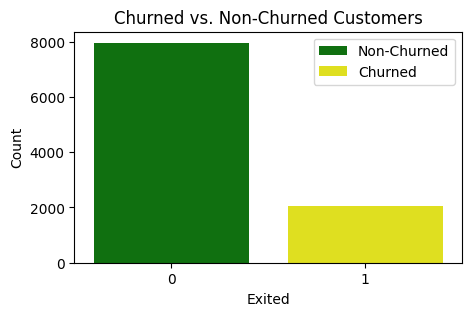

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='Exited', data=data, palette={'0': 'green', '1': 'yellow'})


plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Churned vs. Non-Churned Customers')


plt.legend(labels=['Non-Churned', 'Churned'])


plt.show()

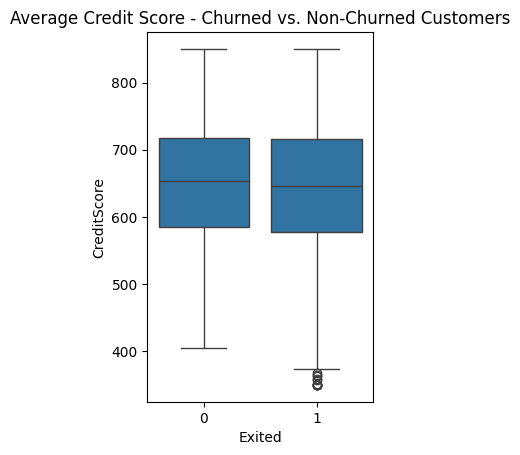

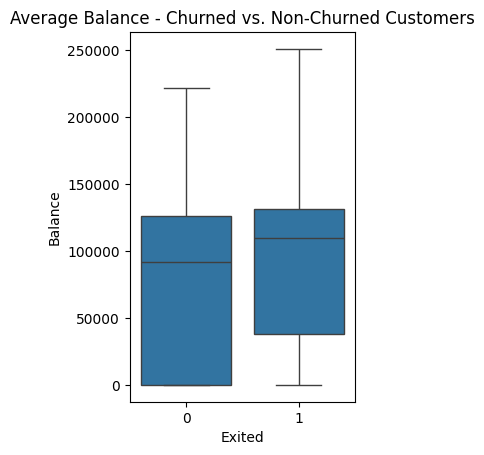

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='CreditScore', data=data)
plt.xlabel('Exited')
plt.ylabel('CreditScore')
plt.title('Average Credit Score - Churned vs. Non-Churned Customers')

plt.show()

plt.subplot(1, 2, 2)
sns.boxplot(x='Exited', y='Balance', data=data)
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.title('Average Balance - Churned vs. Non-Churned Customers')

plt.show()

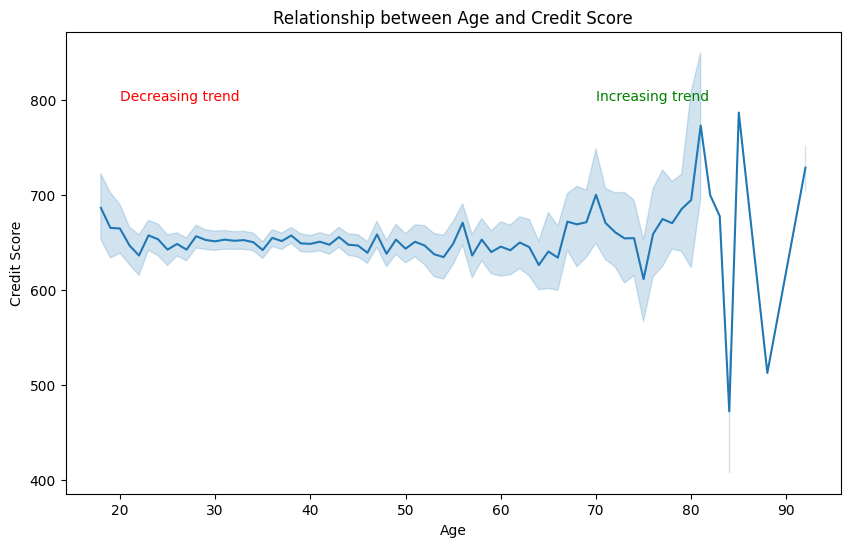

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


sns.lineplot(x='Age', y='CreditScore', data=data)


plt.xlabel('Age')  # Label for the x-axis
plt.ylabel('Credit Score')  # Label for the y-axis
plt.title('Relationship between Age and Credit Score')  # Title of the plot

plt.text(20, 800, 'Decreasing trend', fontsize=10, color='red')  # Annotation indicating decreasing trend
plt.text(70, 800, 'Increasing trend', fontsize=10, color='green')  # Annotation indicating increasing trend

# Show the plot
plt.show()


In [ ]:
import numpy as np
df1 = pd.pivot_table(data, values='Exited', index=['Gender'], aggfunc=np.mean)
df2 = pd.pivot_table(data,values='Exited', index=['Geography'],aggfunc = np.mean)


<ipython-input-20-c2269fa8514a>:2: FutureWarning: The provided callable <function mean at 0x7e8f82bddf80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1 = pd.pivot_table(data, values='Exited', index=['Gender'], aggfunc=np.mean)
<ipython-input-20-c2269fa8514a>:3: FutureWarning: The provided callable <function mean at 0x7e8f82bddf80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df2 = pd.pivot_table(data,values='Exited', index=['Geography'],aggfunc = np.mean)


In [ ]:
df2

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


In [ ]:
x=data.drop(['Exited'],axis=1)
y=data['Exited']

In [ ]:
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
x.drop(['Surname', 'Geography', 'Gender'], axis=1, inplace=True)


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=50)

In [ ]:
from sklearn.linear_model import LogisticRegression
reg_model = LogisticRegression()
reg_model.fit(x_train,y_train)
y_pred_lr = reg_model.predict(x_test)
y_train_pred = reg_model.predict(x_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the test accuracy
test_acc_lr = accuracy_score(y_test, y_pred_lr)
print(" Test Accuracy:", test_acc_lr)

#Evaluating Train Accuracy
train_acc_lr = accuracy_score(y_train,y_train_pred)
print("Train Accuracy:", train_acc_lr)
#printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr,zero_division=1))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

 Test Accuracy: 0.8003333333333333
Train Accuracy: 0.7945714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2401
           1       1.00      0.00      0.00       599

    accuracy                           0.80      3000
   macro avg       0.90      0.50      0.44      3000
weighted avg       0.84      0.80      0.71      3000

Confusion Matrix:
[[2401    0]
 [ 599    0]]


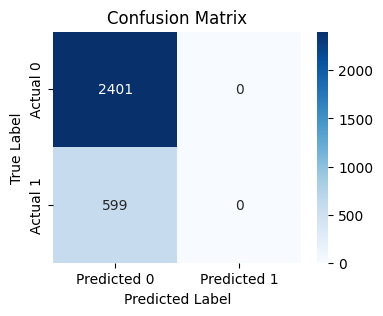

In [ ]:
#visualizing confusion matrix of logistic regression
from sklearn.metrics import confusion_matrix

# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix as heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(x_train, y_train)

# Predict on the testing set
y_pred_svm = svm_classifier.predict(x_test)
#predict on training set
y_train_pred = svm_classifier.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the test accuracy
test_acc_svm = accuracy_score(y_test, y_pred_svm)
print(" Test Accuracy:", test_acc_svm)

#Evaluating Train Accuracy
train_acc_svm = accuracy_score(y_train,y_train_pred)
print("Train Accuracy:", train_acc_svm)
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm,zero_division=1))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

 Test Accuracy: 0.8003333333333333
Train Accuracy: 0.7945714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2401
           1       1.00      0.00      0.00       599

    accuracy                           0.80      3000
   macro avg       0.90      0.50      0.44      3000
weighted avg       0.84      0.80      0.71      3000

Confusion Matrix:
[[2401    0]
 [ 599    0]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(x_train, y_train)

# Predict on the testing set
y_pred_rf = rf_classifier.predict(x_test)

# Predict on the training set
y_train_pred_rf = rf_classifier.predict(x_train)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the test accuracy
test_acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy:", test_acc_rf)

# Evaluate the train accuracy
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
print("Train Accuracy:", train_acc_rf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Test Accuracy: 0.8546666666666667
Train Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2401
           1       0.72      0.45      0.55       599

    accuracy                           0.85      3000
   macro avg       0.80      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000

Confusion Matrix:
[[2296  105]
 [ 331  268]]


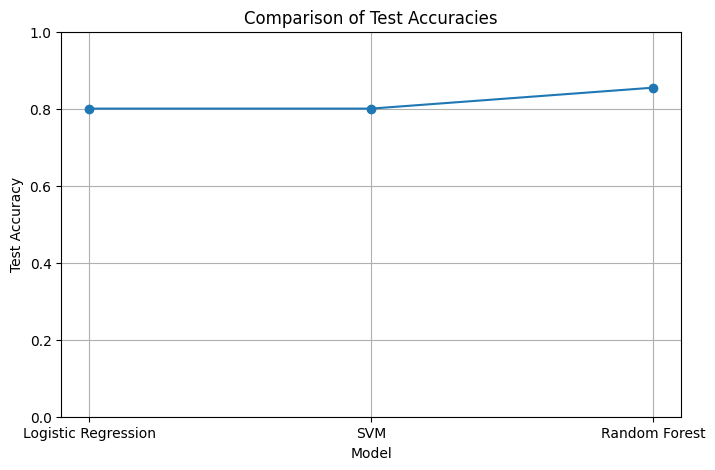

In [ ]:
import matplotlib.pyplot as plt

test_accuracies = [test_acc_lr, test_acc_svm, test_acc_rf]

model_names = ['Logistic Regression', 'SVM', 'Random Forest']

plt.figure(figsize=(8, 5))
plt.plot(model_names, test_accuracies, marker='o')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies')
plt.ylim(0, 1)
plt.grid(True)
plt.show()
